In [2]:
import pandas as pd

In [3]:
# Load all the files
transaction = pd.read_excel(r"C:\Users\brand\Downloads\Transaction.xlsx")
user = pd.read_excel(r"C:\Users\brand\Downloads\User.xlsx")
item = pd.read_excel(r"C:\Users\brand\Downloads\Item.xlsx")
updated_item = pd.read_excel(r"C:\Users\brand\Downloads\Updated_Item.xlsx")
type_df = pd.read_excel(r"C:\Users\brand\Downloads\Type.xlsx")
mode = pd.read_excel(r"C:\Users\brand\Downloads\Mode.xlsx")
region = pd.read_excel(r"C:\Users\brand\Downloads\Region.xlsx")
country = pd.read_excel(r"C:\Users\brand\Downloads\Country.xlsx")
continent = pd.read_excel(r"C:\Users\brand\Downloads\Continent.xlsx")
city = pd.read_excel(r"C:\Users\brand\Downloads\City.xlsx")

In [4]:

# Merge user with  continent
user = user.merge(continent, on="ContinentId", how="left")

In [5]:
# Merge user with region
user = user.merge(region[['RegionId', 'Region']], on="RegionId", how="left")

In [6]:
# Merge user with country
user = user.merge(country[['CountryId', 'Country']], on="CountryId", how="left")

In [7]:
# Merge user with city
user = user.merge(city[['CityId', 'CityName']], on="CityId", how="left")

In [8]:

# Merge transaction with updated attraction info
transaction = transaction.merge(updated_item, on="AttractionId", how="left")

In [9]:
# Merge the attraction type
transaction = transaction.merge(type_df, on="AttractionTypeId", how="left")

In [10]:
# Merge the visit mode name
transaction = transaction.merge(mode, left_on="VisitMode", right_on="VisitModeId", how="left")

In [11]:

# Merge user info into transaction
full_df = transaction.merge(user, on="UserId", how="left")

In [12]:
# renaming the columns
full_df.rename(columns={
    "VisitMode": "VisitModeId",
    "VisitMode_y": "VisitMode",
    "CityName": "UserCity",
    "Country": "UserCountry",
    "Region": "UserRegion",
    "Continent": "UserContinent",
    "CityId": "UserCityId"
}, inplace=True)

In [13]:
# Dropping unwanted columns
drop_cols = ["VisitModeId", "VisitModeId_y", "VisitMode_x", "ContinentId", "RegionId", "CountryId", "CityId"]
full_df.drop(columns=[col for col in drop_cols if col in full_df.columns], inplace=True)

In [14]:

full_df.to_csv("final_cleaned_dataset.csv", index=False)
full_df.shape

(52930, 17)

In [15]:
full_df.head(5)

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode,UserCityId,UserContinent,UserRegion,UserCountry,UserCity
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples,4341.0,Europe,Western Europe,United Kingdom,Guildford
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Friends,464.0,America,Northern America,Canada,Ontario
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family,774.0,America,South America,Brazil,Brazil
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family,583.0,Europe,Central Europe,Switzerland,Zurich
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples,1396.0,Europe,Western Europe,United Kingdom,Manchester


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Final Dataset

df = pd.read_csv("final_cleaned_dataset.csv")
print(df.head())

   TransactionId  UserId  VisitYear  VisitMonth  AttractionId  Rating  \
0              3   70456       2022          10           640       5   
1              8    7567       2022          10           640       5   
2              9   79069       2022          10           640       5   
3             10   31019       2022          10           640       3   
4             15   43611       2022          10           640       3   

   AttractionCityId  AttractionTypeId                      Attraction  \
0                 1                63  Sacred Monkey Forest Sanctuary   
1                 1                63  Sacred Monkey Forest Sanctuary   
2                 1                63  Sacred Monkey Forest Sanctuary   
3                 1                63  Sacred Monkey Forest Sanctuary   
4                 1                63  Sacred Monkey Forest Sanctuary   

                         AttractionAddress           AttractionType VisitMode  \
0  Jl. Monkey Forest, Ubud 80571 Indonesi

Statistical Analysis

In [17]:

# Checking Missing Value 

print("\n Missing Values:\n", df.isnull().sum())


 Missing Values:
 TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
AttractionId         0
Rating               0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
AttractionType       0
VisitMode            0
UserCityId           8
UserContinent        0
UserRegion           0
UserCountry          0
UserCity             8
dtype: int64


In [18]:
#  Drop rows due to small count
df.dropna(subset=["UserCity", "UserCityId"], inplace=True)

In [19]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
AttractionId         0
Rating               0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
AttractionType       0
VisitMode            0
UserCityId           0
UserContinent        0
UserRegion           0
UserCountry          0
UserCity             0
dtype: int64


Skewness of Rating: -1.19792165619593


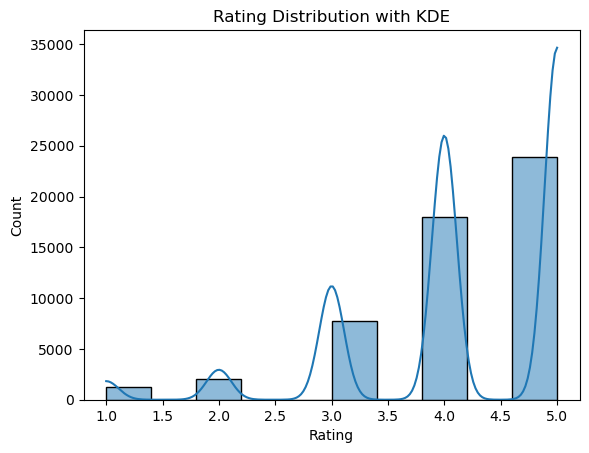

In [20]:
# Check Skewness 
print("Skewness of Rating:", df["Rating"].skew())

# plotting
sns.histplot(df["Rating"], bins=10, kde=True)
plt.title("Rating Distribution with KDE")
plt.show()


In [21]:
# Outlier Detection Using IQR
Q1 = df["Rating"].quantile(0.25)
Q3 = df["Rating"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["Rating"] < lower) | (df["Rating"] > upper)]
# Remove outliers
df = df[(df["Rating"] >= lower) & (df["Rating"] <= upper)]

In [63]:
print("New Skewness:", df["Rating"].skew())

New Skewness: -0.590604947016075


In [64]:
# Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

cat_cols = ["VisitMode", "UserContinent", "UserCountry", "UserRegion", "UserCity", "AttractionType"]
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col + "_Encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Group the data by each user
user_profile = df.groupby("UserId").agg({
    "Rating": ["mean", "count"],                
    "VisitMode_Encoded": pd.Series.mode        
})

# Rename columns for clarity
user_profile.columns = [
    "Avg_Rating_User",         
    "Total_Visits_User",       
    "Most_Common_Mode"        
]
user_profile.reset_index(inplace=True)

df = df.merge(user_profile, on="UserId", how="left")

In [66]:
# Normalizing Numerical Features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Rating_Scaled", "Avg_Rating_User_Scaled"]] = scaler.fit_transform(df[["Rating", "Avg_Rating_User"]])

In [67]:
# Saving preprocessed dataset
df.to_csv("preprocessed_dataset.csv", index=False)

In [68]:
df.head(5)

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,...,UserContinent_Encoded,UserCountry_Encoded,UserRegion_Encoded,UserCity_Encoded,AttractionType_Encoded,Avg_Rating_User,Total_Visits_User,Most_Common_Mode,Rating_Scaled,Avg_Rating_User_Scaled
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,4,143,21,1755,8,5.0,1,1,1.0,1.00
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,1,27,12,3396,8,5.0,1,3,1.0,1.00
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,1,21,15,615,8,5.0,1,2,1.0,1.00
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,4,131,6,5277,8,3.0,2,2,0.0,0.00
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,4,143,21,2760,8,3.5,2,1,0.0,0.25


EDA Analysis

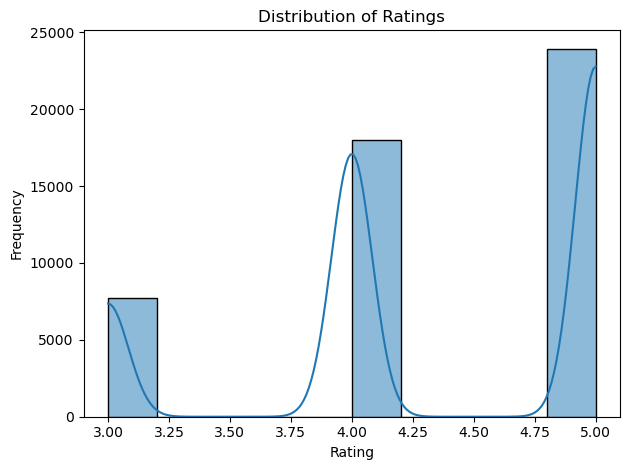

In [69]:
#  Rating Distribution

plt.figure()
sns.histplot(df["Rating"], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

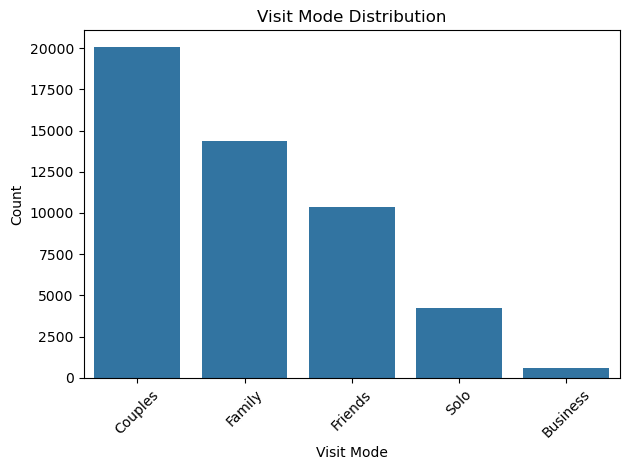

In [70]:
# Visit Mode Distribution
plt.figure()
sns.countplot(data=df, x="VisitMode", order=df["VisitMode"].value_counts().index)
plt.title("Visit Mode Distribution")
plt.xlabel("Visit Mode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

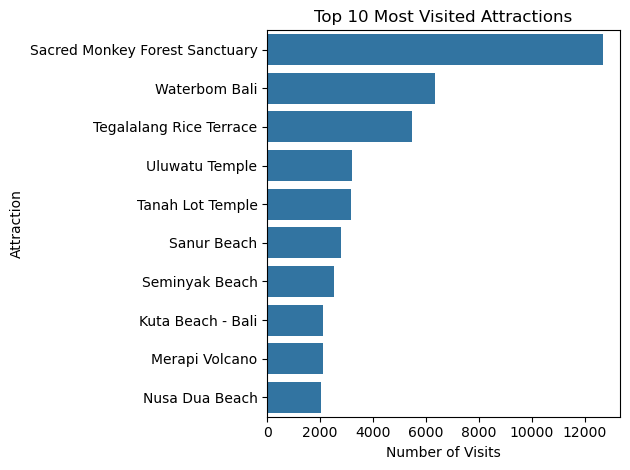

In [71]:

# Top 10 Most Visited Attractions

top_attractions = df["Attraction"].value_counts().nlargest(10)
plt.figure()
sns.barplot(x=top_attractions.values, y=top_attractions.index)
plt.title("Top 10 Most Visited Attractions")
plt.xlabel("Number of Visits")
plt.ylabel("Attraction")
plt.tight_layout()
plt.show()

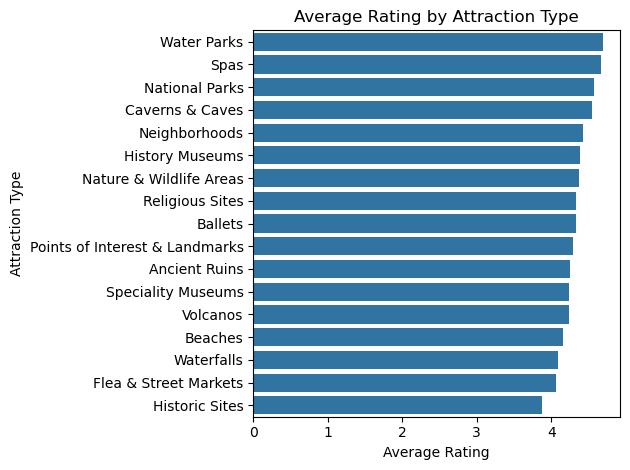

In [72]:

#  Average Rating by Attraction Type

avg_rating_by_type = df.groupby("AttractionType")["Rating"].mean().sort_values(ascending=False)
plt.figure()
sns.barplot(x=avg_rating_by_type.values, y=avg_rating_by_type.index)
plt.title("Average Rating by Attraction Type")
plt.xlabel("Average Rating")
plt.ylabel("Attraction Type")
plt.tight_layout()
plt.show()

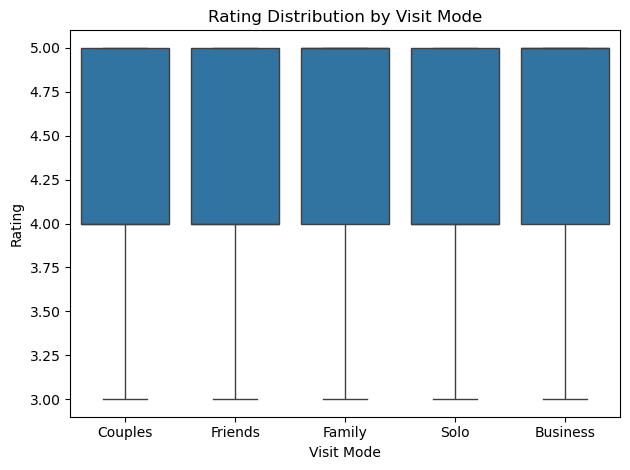

In [73]:

#  Visit Mode vs Rating

plt.figure()
sns.boxplot(x="VisitMode", y="Rating", data=df)
plt.title("Rating Distribution by Visit Mode")
plt.xlabel("Visit Mode")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

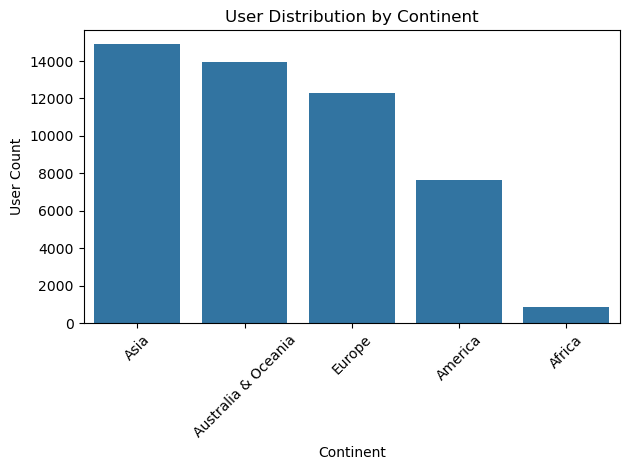

In [74]:
# Continent-wise User Distribution

plt.figure()
sns.countplot(data=df, x="UserContinent", order=df["UserContinent"].value_counts().index)
plt.title("User Distribution by Continent")
plt.xlabel("Continent")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


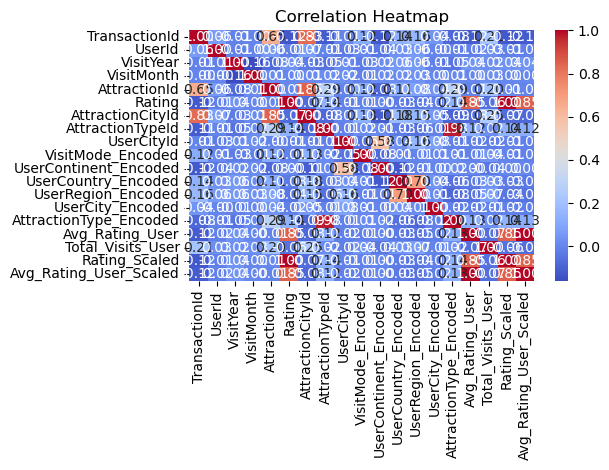

In [75]:

# Correlation Heatmap (Numerical Features)

plt.figure()
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib
import pickle
import numpy as np


df = pd.read_csv("preprocessed_dataset.csv")

feature_cols = [
    "VisitYear", "VisitMonth",
    "UserContinent", "UserRegion", "UserCountry", "UserCity",
    "AttractionType",
    "Total_Visits_User", "Avg_Rating_User_Scaled"
]

categorical_cols = ["UserContinent", "UserRegion", "UserCountry", "UserCity", "AttractionType", "VisitMode"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_Encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")  # Save encoder

# Define Regression Inputs/Outputs
regression_features = [
    "VisitYear", "VisitMonth",
    "UserContinent_Encoded", "UserRegion_Encoded", "UserCountry_Encoded", "UserCity_Encoded",
    "AttractionType_Encoded",
    "Total_Visits_User", "Avg_Rating_User_Scaled"
]
regression_target = "Rating"

# Train Regression Model
X_reg = df[regression_features]
y_reg = df[regression_target]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Evaluate and Save Regression Model

y_pred_reg = reg_model.predict(X_test_reg)
print("Regression Results")
print("R² Score:", r2_score(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))) 
pickle.dump(reg_model, open("regression_model.pkl", "wb"))

# Define Classification Inputs/Outputs
classification_target = "VisitMode_Encoded"
X_clf = df[regression_features]  # same features
y_clf = df["VisitMode_Encoded"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Evaluate and Save Classification Model
y_pred_clf = clf_model.predict(X_test_clf)
print("\nClassification Results")
print(classification_report(y_test_clf, y_pred_clf))
pickle.dump(clf_model, open("classification_model.pkl", "wb"))

Regression Results
R² Score: 0.6508670700135255
RMSE: 0.42865176598275545

Classification Results
              precision    recall  f1-score   support

           0       0.48      0.27      0.35       126
           1       0.56      0.72      0.63      3972
           2       0.56      0.54      0.55      2887
           3       0.48      0.36      0.41      2095
           4       0.50      0.27      0.35       845

    accuracy                           0.54      9925
   macro avg       0.52      0.43      0.46      9925
weighted avg       0.54      0.54      0.53      9925



In [77]:
# test case
user_input = {
    "VisitYear": 2025,
    "VisitMonth": 7,
    "UserContinent": "Europe",
    "UserRegion": "Western Europe",
    "UserCountry": "France",
    "UserCity": "Paris",
    "AttractionType": "Nature & Wildlife Areas",
    "Total_Visits_User": 5,
    "Avg_Rating_User_Scaled": 0.8
}


def safe_encode(encoder, value):
    if value in encoder.classes_:
        return encoder.transform([value])[0]
    else:
        print(f" '{value}' not seen during training. Using default class.")
        return -1 


encoded_input = {
    "VisitYear": user_input["VisitYear"],
    "VisitMonth": user_input["VisitMonth"],
    "UserContinent_Encoded": safe_encode(label_encoders["UserContinent"], user_input["UserContinent"]),
    "UserRegion_Encoded": safe_encode(label_encoders["UserRegion"], user_input["UserRegion"]),
    "UserCountry_Encoded": safe_encode(label_encoders["UserCountry"], user_input["UserCountry"]),
    "UserCity_Encoded": safe_encode(label_encoders["UserCity"], user_input["UserCity"]),
    "AttractionType_Encoded": safe_encode(label_encoders["AttractionType"], user_input["AttractionType"]),
    "Total_Visits_User": user_input["Total_Visits_User"],
    "Avg_Rating_User_Scaled": user_input["Avg_Rating_User_Scaled"]
}

#  Convert to DataFrame
X_input = pd.DataFrame([encoded_input])

#  Predict Rating (Regression)
predicted_rating = reg_model.predict(X_input)[0]
print(f"Predicted Rating: {predicted_rating:.2f} / 5")

#  Predict Visit Mode (Classification)
predicted_mode_code = clf_model.predict(X_input)[0]
predicted_mode = label_encoders["VisitMode"].inverse_transform([predicted_mode_code])[0]
print(f" Predicted Visit Mode: {predicted_mode}")

Predicted Rating: 4.78 / 5
 Predicted Visit Mode: Couples


3. RECOMMENDATION TASKS
 A. Collaborative Filtering (using Surprise)

In [1]:
from surprise import Dataset, SVD
print("scikit-surprise is working!")

scikit-surprise is working!


In [2]:
conda activate recommender


Note: you may need to restart the kernel to use updated packages.



CondaError: Run 'conda init' before 'conda activate'



In [3]:
conda install pandas

Retrieving notices: done
Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

#  Load the CSV file 
df = pd.read_csv("preprocessed_dataset.csv")


required_columns = {"UserId", "AttractionId", "Rating"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"CSV must contain columns: {required_columns}")


reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["UserId", "AttractionId", "Rating"]], reader)

#Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

#Train the SVD model
model = SVD()
model.fit(trainset)

# Predict and evaluate
predictions = model.test(testset)
print(" Collaborative Filtering RMSE:", accuracy.rmse(predictions))
print("Collaborative Filtering MAE:", accuracy.mae(predictions))

RMSE: 0.6943
 Collaborative Filtering RMSE: 0.6942669720164018
MAE:  0.5951
Collaborative Filtering MAE: 0.5951240946125639


In [5]:
user_id = 12345  

# Getting all attractions user hasn't rated
rated_items = df[df["UserId"] == user_id]["AttractionId"].unique()
all_items = df["AttractionId"].unique()
unseen_items = [item for item in all_items if item not in rated_items]

# Predicting scores for unseen attractions
preds = [model.predict(user_id, item) for item in unseen_items]
top_preds = sorted(preds, key=lambda x: x.est, reverse=True)[:5]

print("Top 5 Recommendations:")
for p in top_preds:
    name = df[df["AttractionId"] == p.iid]["Attraction"].iloc[0]
    print(f"{name} → Predicted Rating: {p.est:.2f}")

Top 5 Recommendations:
Mount Semeru Volcano → Predicted Rating: 4.74
Bromo Tengger Semeru National Park → Predicted Rating: 4.70
Waterbom Bali → Predicted Rating: 4.67
Khayangan Reflexology & Massage → Predicted Rating: 4.58
Jomblang Cave → Predicted Rating: 4.57


B. Content-Based Filtering (Based on Attraction Features)

In [6]:
pip install pandas scikit-learn matplotlib seaborn scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.metrics.pairwise import cosine_similarity


item_features = df.groupby("AttractionId")[["AttractionType_Encoded", "UserCountry_Encoded"]].mean()
similarity_matrix = cosine_similarity(item_features)

# Recommend similar attractions for a given attraction
attraction_id = 640 
index = item_features.index.get_loc(attraction_id)
similar_scores = list(enumerate(similarity_matrix[index]))
sorted_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:6]

print("Attractions similar to:", df[df["AttractionId"] == attraction_id]["Attraction"].iloc[0])
for idx, score in sorted_scores:
    similar_id = item_features.index[idx]
    name = df[df["AttractionId"] == similar_id]["Attraction"].iloc[0]
    print(f"{name} → Similarity: {score:.2f}")

Attractions similar to: Sacred Monkey Forest Sanctuary
Bromo Tengger Semeru National Park → Similarity: 1.00
Water Castle (Tamansari) → Similarity: 1.00
Sempu Island → Similarity: 1.00
Tegalalang Rice Terrace → Similarity: 1.00
Kalibiru National Park → Similarity: 1.00


In [8]:
pip install sqlalchemy pymysql

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sqlalchemy import create_engine

#  Load the CSV
df = pd.read_csv("preprocessed_dataset.csv")  

# Define database connection info
user = "root"
password = "" 
host = "localhost"
port = "3306"
database = "tourism_db"

# Create engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

#  Upload to MySQL 
df.to_sql("preprocessed_data", con=engine, index=False, if_exists="replace")

print(" Data uploaded to MySQL successfully!")

 Data uploaded to MySQL successfully!
